## Assignment 3
Grant Pennington

## Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv

In [43]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment3/customer_data.csv')

## Analyze data set with functions:
1. .head()
2. .describe()
3. .info()

In [44]:
dataset.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


### Label === 0 -> Low Credit Risk
### Label === 1 -> High Credit Risk

In [45]:
dataset.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


## Dataset columns

In [47]:
dataset.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [48]:
dataset.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

## Impute missing values

<h3>We see that fea_2 is the only column with missing values</h3>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


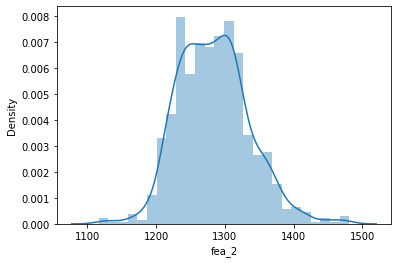

In [49]:
sns.distplot(dataset['fea_2'])

In [50]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')

In [51]:
dataset['fea_2']=imputer.fit_transform(dataset[['fea_2']])

In [52]:
dataset.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

Stratified K Fold Cross validation technique with SVC classifier
Repeated Random Subsampling technique with SVC classifier
Randomized search with Logistic Regressor
Grid search with SVC classifier


## Split data into X and y

In [53]:
X=dataset.drop(['label'], axis=1)
y=dataset['label']

### train test split

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODEL PARAMETERS

In [55]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression

## Stratified K Fold with SVC Classifier

In [56]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC ## classifier
SKFold=StratifiedKFold(n_splits=10)
SVC_model= SVC(kernel='rbf')

In [57]:
SKFold_result = cross_val_score(SVC_model, X, y, cv=SKFold)

In [58]:
SKFold_score = np.mean(SKFold_result)
print(SKFold_score)

0.8000158027812896


## Repeated Random Subsampling technique with SVC classifier

In [59]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
SVC_model= SVC(kernel='rbf')
ssplit = ShuffleSplit( n_splits=10, test_size=0.15 ) ## 85/15
ssplit_result = cross_val_score(SVC_model, X,y, cv=ssplit)

In [60]:
print(max(ssplit_result))

0.8520710059171598


In [61]:
SSPLIT_score = np.mean(ssplit_result)
print(SSPLIT_score)

0.7976331360946746


## Randomized search with Logistic Regressor

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0)

params = {
    'solver': ['lbfgs', 'liblinear']
}

clf=RandomizedSearchCV(logistic, param_distributions=params, return_train_score=True, scoring='accuracy', n_jobs=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=LogisticRegression(random_state=0), n_jobs=1,
                   param_distributions={'solver': ['lbfgs', 'liblinear']},
                   return_train_score=True, scoring='accuracy')

In [63]:
clf_score=clf.score(X_train, y_train)

## Grid search with SVC classifier

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param={
    'kernel': ['rbf', 'linear', 'poly'],
}

In [65]:
grid_search=GridSearchCV(estimator=SVC(), param_grid=param, cv=5, n_jobs=1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_score=grid_search.score(X_train, y_train)

## Pretty Table

In [66]:
from prettytable import PrettyTable

In [67]:
myTable=PrettyTable(["Model", "Best Score", "Average Score"])

In [68]:
myTable.add_row(["Stratified K Fold", max(SKFold_result), SKFold_score])
myTable.add_row(["RRS", max(ssplit_result), SSPLIT_score])
myTable.add_row(["Randomized Search", clf_score, ""])
# myTable.add_row(["Grid Search", grid_score, ""]) 
# for some reason I cannot get the GridSearch to run.

In [69]:
print(myTable)

+-------------------+--------------------+--------------------+
|       Model       |     Best Score     |   Average Score    |
+-------------------+--------------------+--------------------+
| Stratified K Fold | 0.8035714285714286 | 0.8000158027812896 |
|        RRS        | 0.8520710059171598 | 0.7976331360946746 |
| Randomized Search | 0.8088888888888889 |                    |
+-------------------+--------------------+--------------------+
